In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cn=pd.read_csv('cn_android.csv',on_bad_lines='skip') 
cn.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.230.22,192.168.230.66,TCP,66,51059 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...
1,2,0.002615,192.168.230.66,192.168.230.22,TCP,54,"80 > 51059 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
2,3,0.003220,192.168.230.22,192.168.230.66,NBNS,92,Name query NBSTAT *<00><00><00><00><00><00><00...
3,4,0.006271,192.168.230.66,192.168.230.22,ICMP,120,Destination unreachable (Port unreachable)
4,5,2.077054,IntelCor_f9:40:9d,Broadcast,ARP,42,Who has 192.168.230.66? Tell 192.168.230.22


In [3]:
cn.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [4]:
cn.drop('Info',axis=1,inplace=True)

In [5]:
cn["Time"] = cn["Time"].diff(1) 
cn.head()

,No.,Time,Source,Destination,Protocol,Length
0,1,NaN,192.168.230.22,192.168.230.66,TCP,66
1,2,0.002615,192.168.230.66,192.168.230.22,TCP,54
2,3,0.000605,192.168.230.22,192.168.230.66,NBNS,92
3,4,0.003051,192.168.230.66,192.168.230.22,ICMP,120
4,5,2.070783,IntelCor_f9:40:9d,Broadcast,ARP,42


In [6]:
Q3_Time=cn['Time'].quantile(0.75) 
Q1_Time=cn['Time'].quantile(0.25) 
IQR_Time=Q3_Time-Q1_Time 
UL=Q3_Time+1.5*IQR_Time 
LL=Q1_Time-1.5*IQR_Time 
Outlier_Values=cn[(cn['Time']>=UL)|(cn['Time']<=LL)] 
Outlier_Values.count()

No.            7881
Time           7881
Source         7881
Destination    7881
Protocol       7881
Length         7881
dtype: int64

In [7]:
CN=cn[(cn['Time']>LL)&(cn['Time']<UL)]
CN.head()

,No.,Time,Source,Destination,Protocol,Length
1,2,0.002615,192.168.230.66,192.168.230.22,TCP,54
2,3,0.000605,192.168.230.22,192.168.230.66,NBNS,92
3,4,0.003051,192.168.230.66,192.168.230.22,ICMP,120
8,9,0.000069,192.168.230.22,5.9.71.92,TCP,54
15,16,0.003041,192.168.230.66,192.168.230.22,TCP,54


<AxesSubplot:ylabel='Length'>

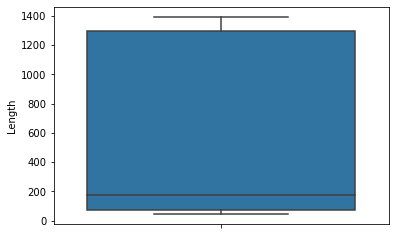

In [8]:
CN.reset_index() 
sns.boxplot(y='Length',data=CN)

In [9]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder() 
CN['Source']= labelencoder.fit_transform(CN['Source'])

In [10]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder() 
CN['Destination']= labelencoder.fit_transform(CN['Destination']) 
CN.head()

,No.,Time,Source,Destination,Protocol,Length
1,2,0.002615,21,18,TCP,54
2,3,0.000605,20,19,NBNS,92
3,4,0.003051,21,18,ICMP,120
8,9,0.000069,20,116,TCP,54
15,16,0.003041,21,18,TCP,54


In [11]:
cols=['Time','Source','Destination','Length'] 
X=CN[cols]

In [12]:
y=CN.Protocol

In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler() 
X_train= st_x.fit_transform(X_train) 
X_test= st_x.transform(X_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='gini') 
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy of Cart DecisionTree:",metrics.accuracy_score(y_test, y_pred))
print("Precision of Cart DecisionTree:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall of Cart DecisionTree:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy of Cart DecisionTree: 0.8531733981172184
Precision of Cart DecisionTree: 0.8534428350385985
Recall of Cart DecisionTree: 0.8531733981172184


In [16]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print("Accuracy of SVM:",metrics.accuracy_score(y_test, y_pred))
print("Precision of SVM:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall of SVM:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy of SVM: 0.6332371697540237
Precision of SVM: 0.564599377646923
Recall of SVM: 0.6332371697540237


In [17]:
from sklearn.naive_bayes import GaussianNB 
model=GaussianNB(priors=None, var_smoothing=1e-09) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))
print("Precision of Naive Bayes:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall of Naive Bayes:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy of Naive Bayes: 0.4291679319769207
Precision of Naive Bayes: 0.49820553336916984
Recall of Naive Bayes: 0.4291679319769207


In [18]:
CN['Protocol'].unique()

array(['TCP', 'NBNS', 'ICMP', 'DNS', 'TLSv1.2', 'ARP', 'SSDP', 'HTTP',
       'IGMPv3', 'TLSv1.3', 'QUIC', 'SSLv2', 'TLSv1', 'SSL', 'MDNS'],
      dtype=object)